In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering as AC

data = pd.read_csv("../Crimes_-_2001_to_Present.csv");
data = data[:100000]
def scale_df(df,axis=0):
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='PuRd'):
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    

C:\Users\Mugdha\AppData\Local\Temp/ipykernel_25224/3799575682.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return (df - df.mean(axis=axis)) / df.std(axis=axis)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
def scale_and_plot(df, ix = None):
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort()
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)

scale_and_plot(data)

In [3]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [28]:
import numpy as np

In [6]:
for crime in data['Primary Type']:
    print(crime.lower())
    break

battery


In [68]:
import pandas as pd
data = pd.read_csv("data/2021.csv")
data.shape

(158084, 22)

In [2]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('model/GoogleNews-vectors-negative300.bin', binary=True)  

In [3]:
model.vector_size

300

In [4]:
len(data['Primary Type'])

158084

In [62]:
for crime in data['Primary Type']:
    if (crime.lower() == 'deceptive practice'):
        print(crime)
        break

DECEPTIVE PRACTICE


In [50]:
#offense involving children
v3 = model['offense']
v4 = model['involving']
v5 = model['children']

print(v3)
print()
print(v4)
print()
print(v5)
print()

avgVec345 = (v3 + v4 + v5) / 3;
print(avgVec345)

[ 4.96093750e-01 -8.30078125e-02  3.80859375e-01 -9.22851562e-02
  6.22558594e-02 -2.18750000e-01 -1.35742188e-01 -5.71289062e-02
 -1.25732422e-02  1.83105469e-02  2.34375000e-01  1.26953125e-01
  8.93554688e-02  7.95898438e-02 -6.78710938e-02 -4.85839844e-02
  1.83593750e-01 -6.34193420e-05 -9.66796875e-02 -2.83203125e-01
  2.61718750e-01  3.34472656e-02  2.21679688e-01 -6.98242188e-02
 -1.04980469e-01 -1.48437500e-01 -7.61718750e-02  1.11328125e-01
 -1.63085938e-01  2.31445312e-01 -1.59179688e-01 -2.67578125e-01
 -4.71191406e-02  1.59912109e-02  1.67968750e-01  3.30078125e-01
  1.66992188e-01 -4.00390625e-02  1.66992188e-01  3.88671875e-01
  2.12890625e-01 -1.59179688e-01 -2.21679688e-01 -1.76757812e-01
  1.91406250e-01 -2.15820312e-01  7.22656250e-02  2.86865234e-03
  9.27734375e-02  2.18750000e-01  2.11914062e-01 -1.86523438e-01
 -1.64062500e-01  2.57492065e-04 -2.39257812e-02 -1.03027344e-01
  4.17968750e-01  1.32812500e-01 -1.74804688e-01 -2.08984375e-01
  6.54296875e-02 -1.15722

In [21]:
v1 = model['deceptive']
v2 = model['practice']

print(v1)
print(type(v1))
print()
print(v2)
print(type(v2))

[ 0.48632812  0.3359375   0.01879883 -0.06787109 -0.01489258  0.16699219
  0.13964844  0.31835938  0.16699219 -0.00927734  0.02783203  0.11669922
 -0.19433594  0.09228516 -0.19433594  0.09326172  0.07568359  0.04125977
 -0.38671875 -0.02050781  0.14746094 -0.02758789 -0.09472656  0.10009766
  0.01013184 -0.20410156  0.15820312  0.01428223  0.19726562  0.08691406
 -0.01293945 -0.01599121  0.18261719  0.21582031  0.14746094  0.01599121
 -0.10986328  0.07519531  0.26171875 -0.35546875  0.06982422  0.01635742
 -0.06347656 -0.11035156 -0.10253906  0.04223633  0.08691406  0.2578125
  0.22070312  0.09179688 -0.03271484  0.32226562  0.17773438 -0.11621094
  0.03833008  0.32421875  0.01208496 -0.5234375   0.00144958  0.01397705
 -0.18066406  0.32226562 -0.46679688  0.16113281  0.0246582  -0.00964355
  0.0037384   0.40234375 -0.04077148  0.06494141 -0.11962891  0.21777344
  0.18457031  0.04199219 -0.01373291  0.11865234 -0.10986328  0.06005859
  0.12109375  0.08007812 -0.15332031  0.13085938 -0.

In [25]:
print(v1.shape)

(300,)


In [26]:
print(v2.shape)

(300,)


In [31]:
v1_v2_avg = (v1 + v2)/2
print(v1_v2_avg)

[ 0.24406433  0.21289062 -0.02526855 -0.01184082  0.02453613  0.08342648
  0.06134033  0.01660156  0.04150391 -0.00611877  0.09643555  0.00952148
  0.04150391  0.0501709  -0.27197266  0.13842773  0.12915039  0.16320801
 -0.1484375  -0.10400391  0.15234375 -0.02941895 -0.14941406  0.15600586
 -0.0569458  -0.09332275 -0.08691406 -0.03778076 -0.02050781  0.04824829
 -0.08410645  0.04986572  0.24267578  0.04052734  0.11254883  0.12957764
  0.01977539  0.04284668  0.41601562 -0.28808594  0.07568359 -0.03063965
 -0.02737427 -0.07470703 -0.06500244  0.03845215 -0.1274414   0.08032227
  0.17578125  0.12451172  0.12817383  0.24072266 -0.00830078 -0.02075195
  0.15783691  0.20922852  0.08612061 -0.22949219  0.04613495 -0.06234741
 -0.1538086   0.12036133 -0.28125     0.08219147  0.0489502   0.09869385
  0.03580475  0.23266602 -0.04101562  0.10668945 -0.05587769  0.13146973
  0.15917969  0.08740234 -0.02920532  0.02856445  0.0168457  -0.08374023
  0.14257812  0.10302734 -0.08024597  0.05090332 -0

In [30]:
arr1 = np.array([1, 2])
arr2 = np.array([3, 4])
avg = (arr1 + arr2) / 2
print(avg)

[2. 3.]


In [42]:
l1 = ['de', 'pr']
print(l1)

['de', 'pr']


In [45]:
print(l1[1:])

['pr']


In [46]:
print(type(l1))

<class 'list'>


In [47]:
print(l1[0])

de


In [32]:
crimeType_NumericVec = {}
crime_type_vectors = []
uniqueCrimes = []
i = 0
inModel = []
notInModel = []
for crime in data['Primary Type']:
#     i+=1
#     print(i)
    crime = crime.lower()
    
    if crime not in uniqueCrimes:
        uniqueCrimes.append(crime)
    
    if crime in model:
        if crime not in inModel:
            inModel.append(crime)
#         print('Crime: ' + crime + ' PRESENT in model')
        crimeType_NumericVec[crime] = model[crime]
        crime_type_vectors.append(model[crime])
    else:
        if crime not in notInModel:
            notInModel.append(crime)
#         print('Crime: ' + crime + ' not in model')
    
print(len(inModel))
print(len(notInModel))

print(inModel)
print()
print(notInModel)

14
17
['battery', 'assault', 'theft', 'narcotics', 'homicide', 'burglary', 'robbery', 'stalking', 'arson', 'prostitution', 'intimidation', 'kidnapping', 'obscenity', 'gambling']

['deceptive practice', 'sex offense', 'criminal damage', 'other offense', 'weapons violation', 'motor vehicle theft', 'criminal trespass', 'offense involving children', 'public peace violation', 'interference with public officer', 'criminal sexual assault', 'liquor law violation', 'concealed carry license violation', 'public indecency', 'human trafficking', 'non-criminal', 'other narcotic violation']


In [64]:
print(len(crimeType_NumericVec))

14


In [62]:
tempNM = ['battery', 'deceptive practice', 'offense involving children']
tempD = {}

In [72]:
if 'obscenity' in model:
    print('THERE')

THERE


In [77]:
if 'non' in model:
    print('THERE')

THERE


In [83]:
a = 'noncriminal'
a = a.replace('-', ' ')
print(a)

noncriminal


In [106]:
# for eachCrime in tempNM:
tempD = {}
for eachCrime in data['Primary Type']:
    eachCrime = eachCrime.lower()
    if eachCrime not in tempD:
        eachCrimeToConsider = eachCrime.replace('-', ' ')
        tempVecs = []
        newVecAvgd = ''
        for word in eachCrimeToConsider.split(' '):
            word = word.strip()
#             word = word.lower()
#             print(eachCrime)
#             print(word)

            if word in model:
                tempVecs.append(model[word])
            else:
                print('SERIOUS ISSUE!!!! In word: ')
        
        tempVec = tempVecs[0]
        for vec in tempVecs[1:]:
            t2 = tempVec + vec
            tempVec = t2


        newVecAvgd = tempVec / len(tempVecs)

        tempD[eachCrime] = newVecAvgd

In [107]:
tempD

{'deceptive practice': array([ 0.24406433,  0.21289062, -0.02526855, -0.01184082,  0.02453613,
         0.08342648,  0.06134033,  0.01660156,  0.04150391, -0.00611877,
         0.09643555,  0.00952148,  0.04150391,  0.0501709 , -0.27197266,
         0.13842773,  0.12915039,  0.16320801, -0.1484375 , -0.10400391,
         0.15234375, -0.02941895, -0.14941406,  0.15600586, -0.0569458 ,
        -0.09332275, -0.08691406, -0.03778076, -0.02050781,  0.04824829,
        -0.08410645,  0.04986572,  0.24267578,  0.04052734,  0.11254883,
         0.12957764,  0.01977539,  0.04284668,  0.41601562, -0.28808594,
         0.07568359, -0.03063965, -0.02737427, -0.07470703, -0.06500244,
         0.03845215, -0.1274414 ,  0.08032227,  0.17578125,  0.12451172,
         0.12817383,  0.24072266, -0.00830078, -0.02075195,  0.15783691,
         0.20922852,  0.08612061, -0.22949219,  0.04613495, -0.06234741,
        -0.1538086 ,  0.12036133, -0.28125   ,  0.08219147,  0.0489502 ,
         0.09869385,  0.03580

In [104]:
len(tempD)

31

In [67]:
if 'battery' in tempD:
    print('THERE')

THERE


In [61]:
print(tempD)

{'deceptive practice': array([ 0.24406433,  0.21289062, -0.02526855, -0.01184082,  0.02453613,
        0.08342648,  0.06134033,  0.01660156,  0.04150391, -0.00611877,
        0.09643555,  0.00952148,  0.04150391,  0.0501709 , -0.27197266,
        0.13842773,  0.12915039,  0.16320801, -0.1484375 , -0.10400391,
        0.15234375, -0.02941895, -0.14941406,  0.15600586, -0.0569458 ,
       -0.09332275, -0.08691406, -0.03778076, -0.02050781,  0.04824829,
       -0.08410645,  0.04986572,  0.24267578,  0.04052734,  0.11254883,
        0.12957764,  0.01977539,  0.04284668,  0.41601562, -0.28808594,
        0.07568359, -0.03063965, -0.02737427, -0.07470703, -0.06500244,
        0.03845215, -0.1274414 ,  0.08032227,  0.17578125,  0.12451172,
        0.12817383,  0.24072266, -0.00830078, -0.02075195,  0.15783691,
        0.20922852,  0.08612061, -0.22949219,  0.04613495, -0.06234741,
       -0.1538086 ,  0.12036133, -0.28125   ,  0.08219147,  0.0489502 ,
        0.09869385,  0.03580475,  0.23266

In [ ]:
crimeType_NumericVec = {}
crime_type_vectors = []

for crime in data['Primary Type']:
    crime = crime.lower()
    
    if crime in model:
        crimeType_NumericVec[crime] = model[crime]
        crime_type_vectors.append(model[crime])
    else:
        tempVecList = []
        for 

In [70]:
crimeType_NumericVec['deceptive practice']

KeyError: 'deceptive practice'

In [11]:
len(uniqueCrimes)

31

In [10]:
uniqueCrimes

['deceptive practice',
 'battery',
 'sex offense',
 'criminal damage',
 'assault',
 'theft',
 'narcotics',
 'other offense',
 'homicide',
 'weapons violation',
 'motor vehicle theft',
 'criminal trespass',
 'burglary',
 'offense involving children',
 'robbery',
 'public peace violation',
 'interference with public officer',
 'stalking',
 'criminal sexual assault',
 'arson',
 'prostitution',
 'intimidation',
 'kidnapping',
 'liquor law violation',
 'concealed carry license violation',
 'obscenity',
 'public indecency',
 'human trafficking',
 'non-criminal',
 'gambling',
 'other narcotic violation']

In [66]:
crimeType_NumericVec['DECEPTIVE PRACTICE']

KeyError: 'DECEPTIVE PRACTICE'

In [57]:
crimeType_NumericVec

{'battery': array([-0.01708984,  0.27539062,  0.35742188, -0.48046875, -0.03710938,
         0.15917969,  0.01239014, -0.01647949,  0.25390625, -0.14941406,
        -0.16210938,  0.16601562, -0.38085938,  0.15625   ,  0.09521484,
         0.07666016,  0.19628906, -0.16894531,  0.03100586, -0.11572266,
         0.10742188, -0.2734375 , -0.30664062, -0.11865234,  0.02062988,
         0.12988281, -0.14257812,  0.35742188,  0.18652344,  0.18066406,
         0.00823975,  0.13085938, -0.4609375 ,  0.08886719, -0.265625  ,
        -0.13867188,  0.13183594,  0.21777344, -0.09863281,  0.41796875,
        -0.10546875,  0.33398438, -0.11767578,  0.21386719, -0.08349609,
        -0.14257812,  0.25585938,  0.15917969,  0.06201172, -0.27734375,
        -0.13085938, -0.16796875, -0.35742188,  0.26367188,  0.01953125,
         0.11865234, -0.0703125 , -0.20996094,  0.06542969,  0.12695312,
        -0.06738281,  0.13574219, -0.1953125 ,  0.09472656,  0.09716797,
         0.01586914, -0.43359375, -0.100

In [67]:
crime_type_vectors = []
crimeType_NumericVec = {}
for crime in data['Primary Type']:
    crimeLC = crime.lower()
    print(crimeLC)
    crime_type_vectors.append(crimeType_NumericVec[crimeLC])
    break

deceptive practice


KeyError: 'deceptive practice'

In [49]:
len(crime_type_vectors)

92932

In [11]:
crime_type_vectors[0]

array([-0.01708984,  0.27539062,  0.35742188, -0.48046875, -0.03710938,
        0.15917969,  0.01239014, -0.01647949,  0.25390625, -0.14941406,
       -0.16210938,  0.16601562, -0.38085938,  0.15625   ,  0.09521484,
        0.07666016,  0.19628906, -0.16894531,  0.03100586, -0.11572266,
        0.10742188, -0.2734375 , -0.30664062, -0.11865234,  0.02062988,
        0.12988281, -0.14257812,  0.35742188,  0.18652344,  0.18066406,
        0.00823975,  0.13085938, -0.4609375 ,  0.08886719, -0.265625  ,
       -0.13867188,  0.13183594,  0.21777344, -0.09863281,  0.41796875,
       -0.10546875,  0.33398438, -0.11767578,  0.21386719, -0.08349609,
       -0.14257812,  0.25585938,  0.15917969,  0.06201172, -0.27734375,
       -0.13085938, -0.16796875, -0.35742188,  0.26367188,  0.01953125,
        0.11865234, -0.0703125 , -0.20996094,  0.06542969,  0.12695312,
       -0.06738281,  0.13574219, -0.1953125 ,  0.09472656,  0.09716797,
        0.01586914, -0.43359375, -0.10009766, -0.15527344,  0.20

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(crime_type_vectors, data['IUCR'])

In [14]:
kmeans.labels_

array([1, 3, 0, ..., 0, 2, 0], dtype=int32)

In [15]:
kmeans.labels_[:10]

array([1, 3, 0, 1, 4, 0, 4, 0, 3, 1], dtype=int32)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

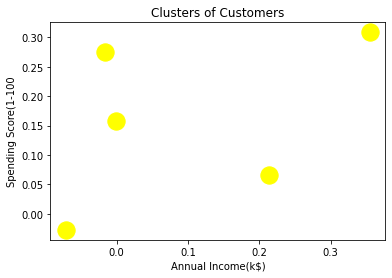

In [41]:
# plt.scatter(data[kmeans==0, 0], data[kmeans==0, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(data[kmeans==1, 0], data[kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(data[kmeans==2, 0], data[kmeans==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(data[kmeans==3, 0], data[kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
# plt.scatter(data[kmeans==4, 0], data[kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 4], label = 'Centroids')


plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

In [30]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')

TypeError: '(slice(None, None, None), 0)' is an invalid key

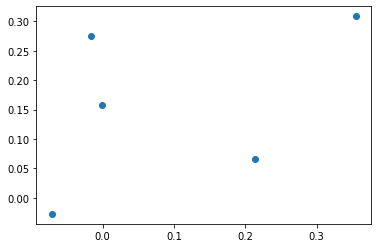

In [40]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], cmap='rainbow')

In [22]:
kmeans.inertia_

38365.16110863802

In [23]:
kmeans.cluster_centers_

array([[ 0.35546875,  0.30859375, -0.328125  , ..., -0.265625  ,
         0.13964844, -0.39453125],
       [-0.01708984,  0.27539063,  0.35742188, ...,  0.00680542,
        -0.21679688,  0.07421875],
       [-0.00145838,  0.15754741, -0.27063668, ..., -0.41661008,
         0.2956999 , -0.28207908],
       [ 0.21348981,  0.06520436,  0.13920593, ..., -0.13412214,
         0.01877504,  0.10210399],
       [-0.07165275, -0.02754439,  0.09970002, ...,  0.07581072,
         0.41471564, -0.16337778]])

In [24]:
kmeans.n_iter_

4

In [25]:
kmeans.labels_[:5]

array([1, 3, 0, 1, 4], dtype=int32)

In [42]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [44]:
data.shape

(158084, 22)

In [45]:
len(kmeans.labels_)

92932